In [25]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import sounddevice as sd

In [26]:
sinal, taxaAmostragem = sf.read('audioMario.wav')
transformadaFourierOriginal = fft(sinal)
frequencias = fftfreq(len(transformadaFourierOriginal), 1/taxaAmostragem)

In [27]:
def filtro_fft(transformadaFourier, frequencias, tipo, frequenciaCorte1, frequenciaCorte2=None):
    transformadaFourierFiltrado = transformadaFourier.copy()
    if tipo == 'baixa':
        transformadaFourierFiltrado[np.abs(frequencias) > frequenciaCorte1] = 0
    elif tipo == 'alta':
        transformadaFourierFiltrado[np.abs(frequencias) < frequenciaCorte1] = 0
    elif tipo == 'banda':
        transformadaFourierFiltrado[(np.abs(frequencias) < frequenciaCorte1) | (np.abs(frequencias) > frequenciaCorte2)] = 0
    else:
        raise ValueError("Tipo inválido")
    return transformadaFourierFiltrado

In [28]:
transformadaFourierBanda = filtro_fft(transformadaFourierOriginal, frequencias, 'banda', 300, 700)
sinalFiltradoBanda = np.real(ifft(transformadaFourierBanda))

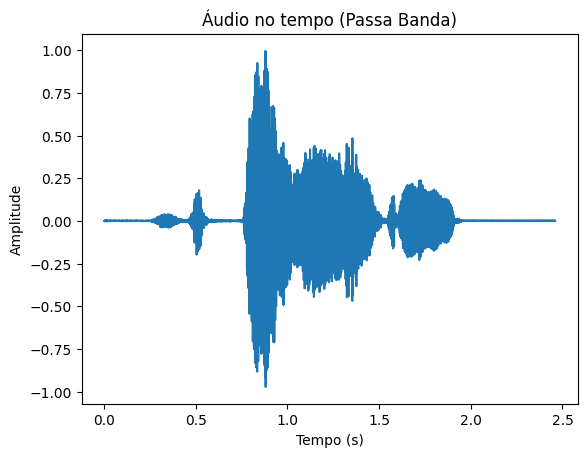

In [29]:
t = np.linspace(0, len(sinalFiltradoBanda)/taxaAmostragem, len(sinalFiltradoBanda))
plt.plot(t, sinalFiltradoBanda)
plt.title("Áudio no tempo (Passa Banda)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

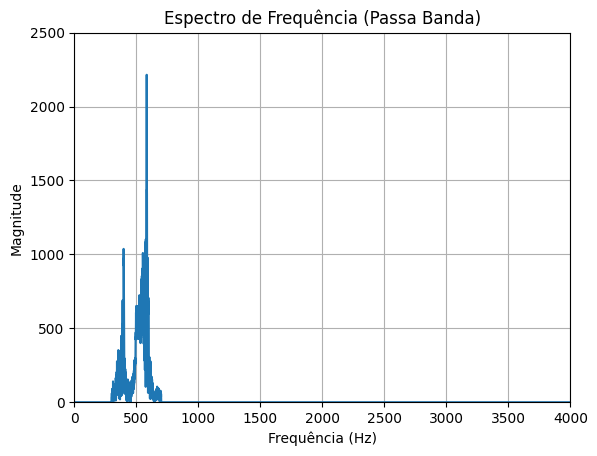

In [30]:
plt.plot(frequencias[:len(transformadaFourierBanda)//12], np.abs(transformadaFourierBanda[:len(transformadaFourierOriginal)//12]))
plt.title("Espectro de Frequência (Passa Banda)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, 4000) 
plt.ylim(0, 2500) 
plt.show()

In [31]:
sd.play(sinalFiltradoBanda, taxaAmostragem)